In [27]:
%pip install plotly



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [29]:
df = pd.read_csv("../data/temp_electricity.csv")

In [30]:
df.head()

Datetime  Consommation               Regions               Nature  year  \
0  2020-01-01      403787.0  Auvergne-Rhône-Alpes  Données définitives  2020   
1  2020-01-02      443531.0  Auvergne-Rhône-Alpes  Données définitives  2020   
2  2020-01-03      434626.0  Auvergne-Rhône-Alpes  Données définitives  2020   
3  2020-01-04      395169.0  Auvergne-Rhône-Alpes  Données définitives  2020   
4  2020-01-05      400169.0  Auvergne-Rhône-Alpes  Données définitives  2020   

   month  day  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  GWETROOT  ...  QV2M  \
0      1    1               5.39               6.80      0.68  ...  4.17   
1      1    2               4.78               6.45      0.68  ...  4.41   
2      1    3               3.80               6.38      0.68  ...  5.00   
3      1    4               3.91               6.99      0.68  ...  4.76   
4      1    5               5.85               7.13      0.67  ...  3.96   

    RH2M   T2M  T2M_MAX  T2M_MIN  T2M_RANGE  WD10M  WS10M  WS2M  insee_dep  
0  96.11  0.81     5.26    -1.36       6.62  314.6   1.44  0.82         83  
1  92.78  2.44     8.35    -0.89       9.24  200.2   3.64  2.26         83  
2  93.72  3.94     8.16     1.49       6.67  246.6   3.21  1.91         83  
3  94.68  3.18     5.62    -0.64       6.26  335.6   4.34  2.77         83  
4  93.92  0.77     4.06    -1.25       5.31  354.9   3.75  2.43         83  

[5 rows x 23 columns]

In [31]:
df.columns

Index(['Datetime', 'Consommation', 'Regions', 'Nature', 'year', 'month', 'day',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'GWETROOT', 'GWETTOP',
       'PRECTOTCORR', 'PS', 'QV2M', 'RH2M', 'T2M', 'T2M_MAX', 'T2M_MIN',
       'T2M_RANGE', 'WD10M', 'WS10M', 'WS2M', 'insee_dep'],
      dtype='object')

### Data Cleaning and Preprocessing 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21924 entries, 0 to 21923
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Datetime           21924 non-null  object 
 1   Consommation       21924 non-null  float64
 2   Regions            21924 non-null  object 
 3   Nature             21924 non-null  object 
 4   year               21924 non-null  int64  
 5   month              21924 non-null  int64  
 6   day                21924 non-null  int64  
 7   ALLSKY_SFC_SW_DWN  21924 non-null  float64
 8   CLRSKY_SFC_SW_DWN  21924 non-null  float64
 9   GWETROOT           21924 non-null  float64
 10  GWETTOP            21924 non-null  float64
 11  PRECTOTCORR        21924 non-null  float64
 12  PS                 21924 non-null  float64
 13  QV2M               21924 non-null  float64
 14  RH2M               21924 non-null  float64
 15  T2M                21924 non-null  float64
 16  T2M_MAX            219

<Axes: >

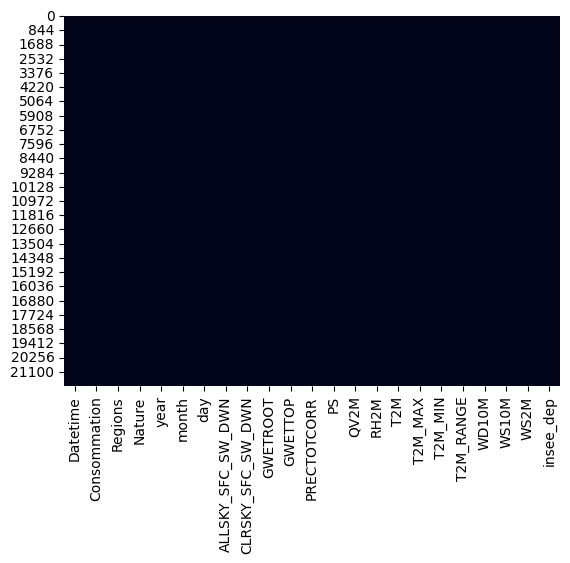

In [33]:
sns.heatmap(df.isnull(), cbar=False)

In [34]:
df["Datetime"] = pd.to_datetime(df["Datetime"])


In [35]:
df["year"] = df["Datetime"].dt.year
df["month"] = df["Datetime"].dt.month
df["dayofweek"] = df["Datetime"].dt.dayofweek  # 0=Mon
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)


In [36]:
df[["Consommation","T2M","T2M_MAX","ALLSKY_SFC_SW_DWN","T2M_MIN","PRECTOTCORR","RH2M","WD10M","PS","WS10M"]].describe()

Consommation           T2M       T2M_MAX  ALLSKY_SFC_SW_DWN  \
count   21924.000000  21924.000000  21924.000000       21924.000000   
mean   204433.967843     12.013618     16.923766          12.832862   
std     94293.008281      6.930725      7.922475           7.962586   
min     58376.000000     -8.040000     -3.690000           0.460000   
25%    125892.500000      6.827500     10.920000           5.710000   
50%    191000.500000     11.635000     16.440000          11.700000   
75%    262712.500000     17.380000     22.710000          19.062500   
max    624804.000000     33.310000     42.330000          32.360000   

            T2M_MIN   PRECTOTCORR          RH2M         WD10M            PS  \
count  21924.000000  21924.000000  21924.000000  21924.000000  21924.000000   
mean       7.537540      1.994065     79.303629    195.470799     98.300271   
std        6.030541      3.699876     13.039571    100.094157      2.955280   
min      -12.570000      0.000000     23.680000      0.000000     87.760000   
25%        3.100000      0.030000     71.980000    114.200000     97.290000   
50%        7.570000      0.360000     81.770000    213.300000     99.140000   
75%       12.170000      2.350000     89.630000    274.300000    100.330000   
max       24.850000     53.790000    100.000000    360.000000    103.610000   

              WS10M  
count  21924.000000  
mean       4.279693  
std        1.967521  
min        0.620000  
25%        2.820000  
50%        3.890000  
75%        5.340000  
max       15.030000

#### Commentaire 


## Visualization 


### Daily trend

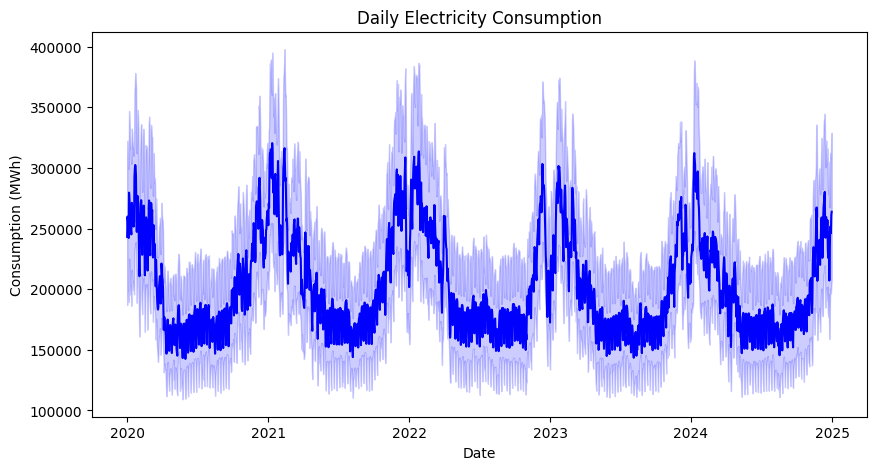

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Datetime", y="Consommation", color='blue')
plt.title("Daily Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption (MWh)")
plt.show()

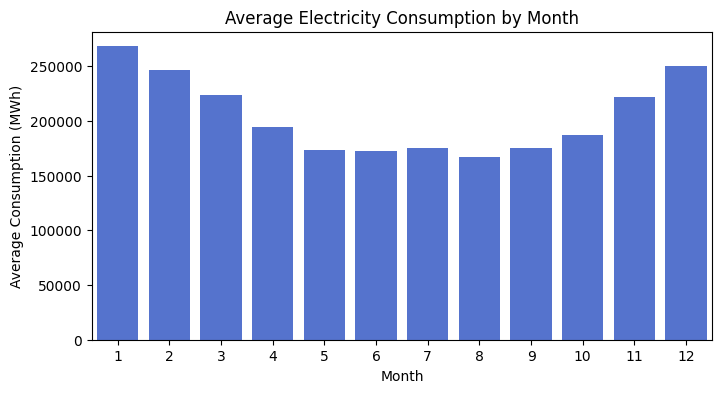

In [38]:
monthly_avg = df.groupby("month")["Consommation"].mean()
plt.figure(figsize=(8,4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, color="royalblue")
plt.title("Average Electricity Consumption by Month")
plt.xlabel("Month")
plt.ylabel("Average Consumption (MWh)")
plt.show()

### Relationship between temperature and consumption

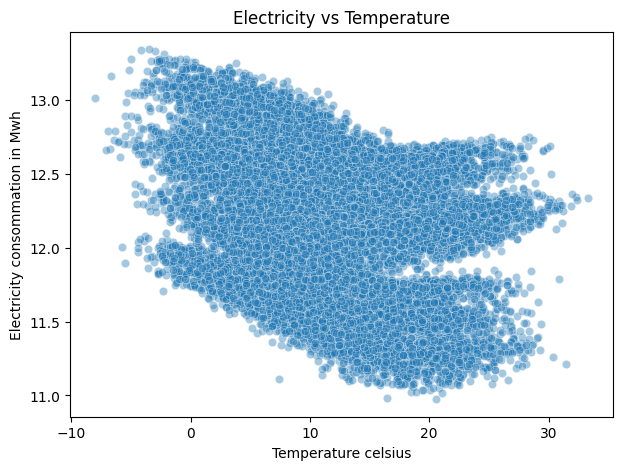

In [39]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="T2M",y=np.log(df["Consommation"]),alpha = 0.4)
plt.title("Electricity vs Temperature")
plt.xlabel("Temperature celsius")
plt.ylabel("Electricity consommation in Mwh")
plt.show()

### Regional comparison 

In [40]:
# plt.figure(figsize=(10,5))
# region_mean = df.groupby("Regions")["Consommation"].mean().sort_values(ascending=False)
# sns.barplot(x=region_mean.index, y=region_mean.values, palette="viridis")
# plt.xticks(rotation=45)
# plt.title("Average Consumption by Regions")
# plt.ylabel("Mean Daily Consumption Mwh")
# plt.xlabel("Regions in France")
# plt.show()


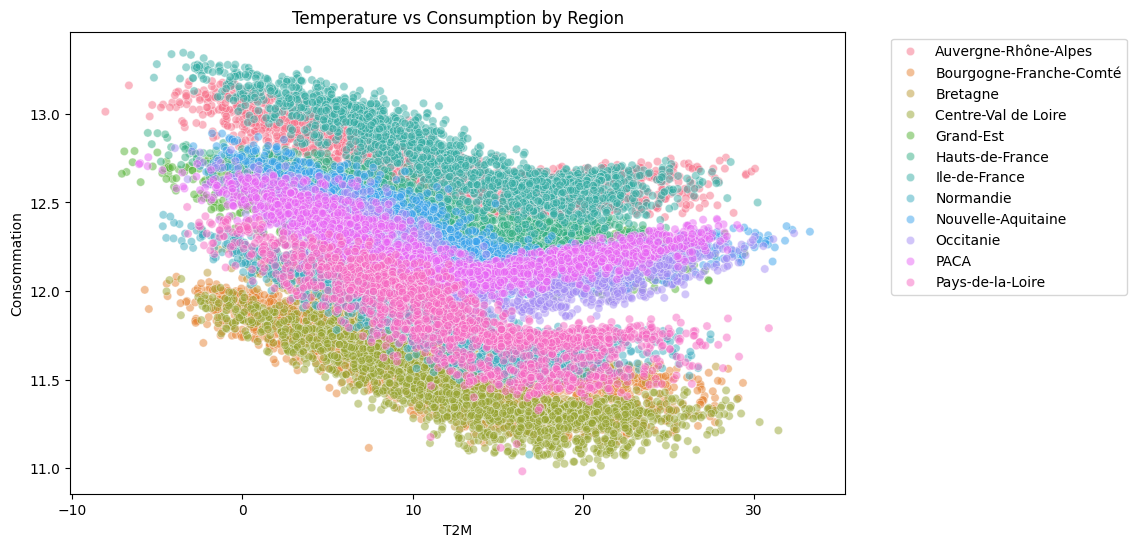

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="T2M", y=np.log(df["Consommation"]), hue="Regions", data=df, alpha=0.5)
plt.title("Temperature vs Consumption by Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Solar Radiation and Consommation

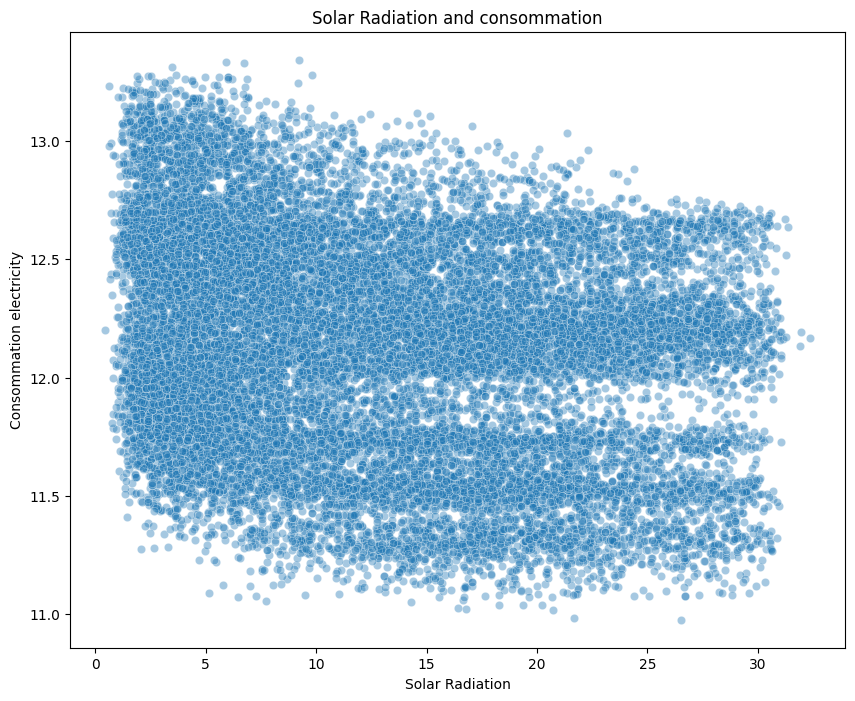

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x ="ALLSKY_SFC_SW_DWN", y = np.log(df["Consommation"]), alpha = 0.4)
plt.title("Solar Radiation and consommation")
plt.xlabel("Solar Radiation")
plt.ylabel("Consommation electricity")
plt.show()

### Humidity vs consommation

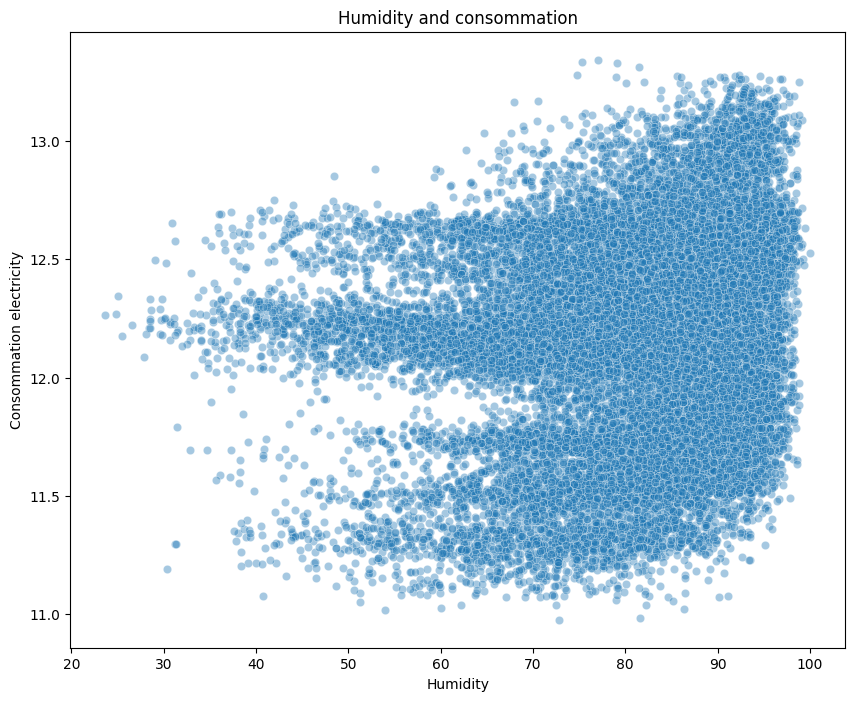

In [43]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x ="RH2M", y = np.log(df["Consommation"]), alpha = 0.4)
plt.title("Humidity and consommation")
plt.xlabel("Humidity")
plt.ylabel("Consommation electricity")
plt.show()

In [44]:
labels = {
    "T2M": "Temperature (°C)",
    "RH2M": "Humidity (%)",
    "WS10M": "Wind Speed (m/s)",
    "ALLSKY_SFC_SW_DWN": "Solar Radiation (W/m²)",
    "PRECTOTCORR": "Precipitation (mm/day)",
    "PS":"Pressure"
}


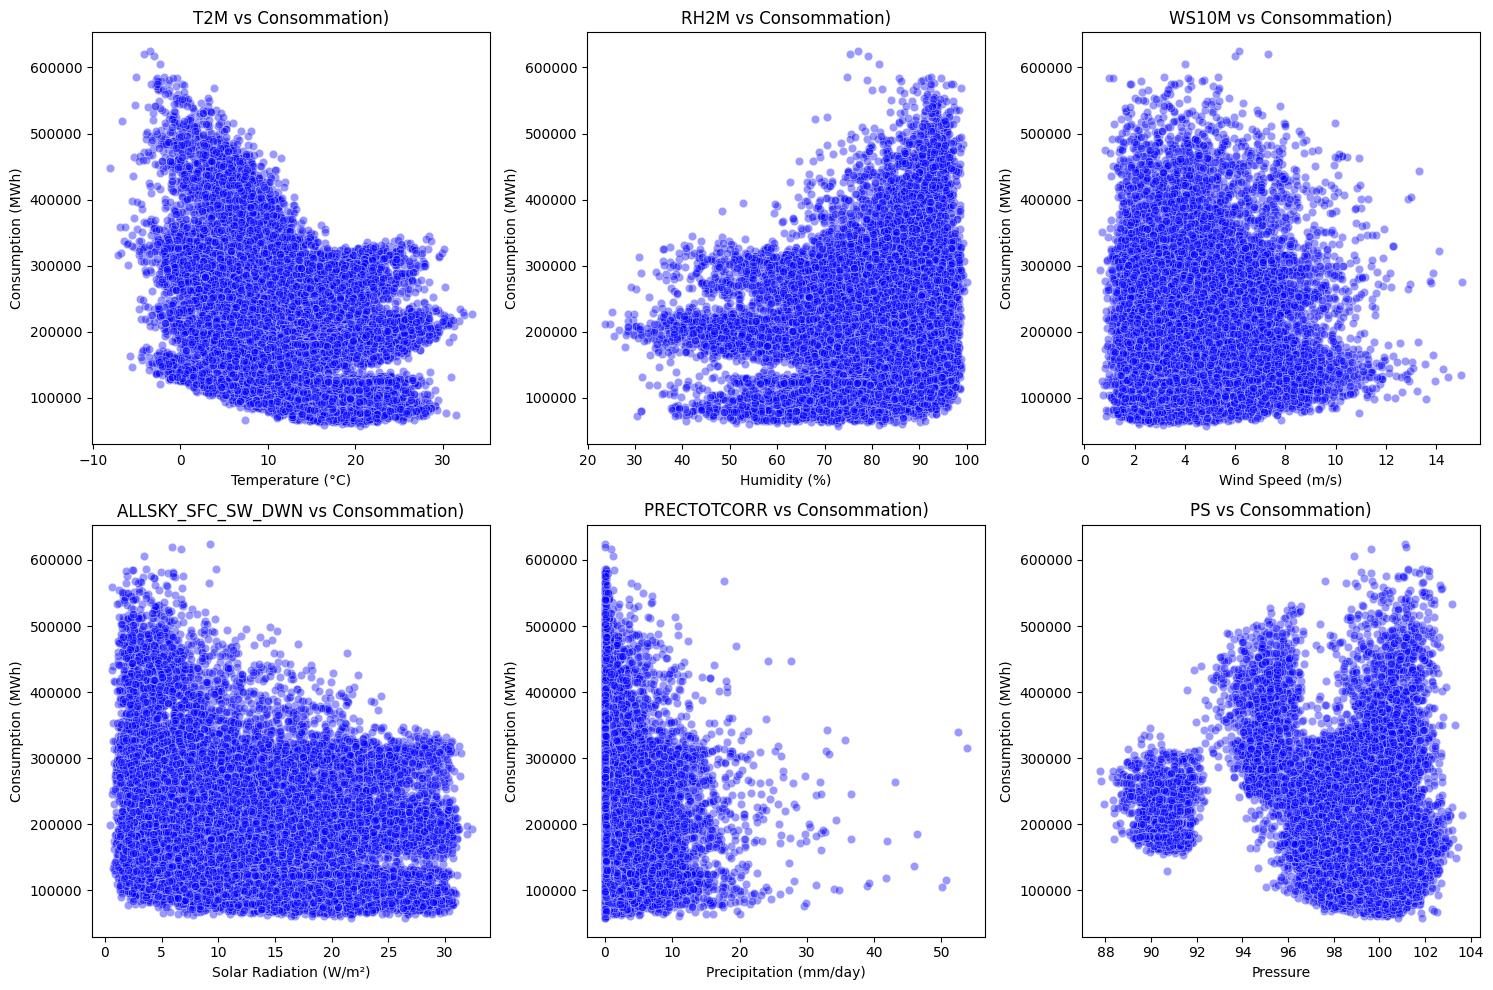

In [45]:
weather_vars = ["T2M", "RH2M", "WS10M", "ALLSKY_SFC_SW_DWN", "PRECTOTCORR","PS"]
plt.figure(figsize=(15, 10))

for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=var, y="Consommation", alpha=0.4, color='blue')
    plt.title(f"{var} vs Consommation)")
    plt.xlabel(labels.get(var, var))
    plt.ylabel("Consumption (MWh)")

plt.tight_layout()
plt.show()


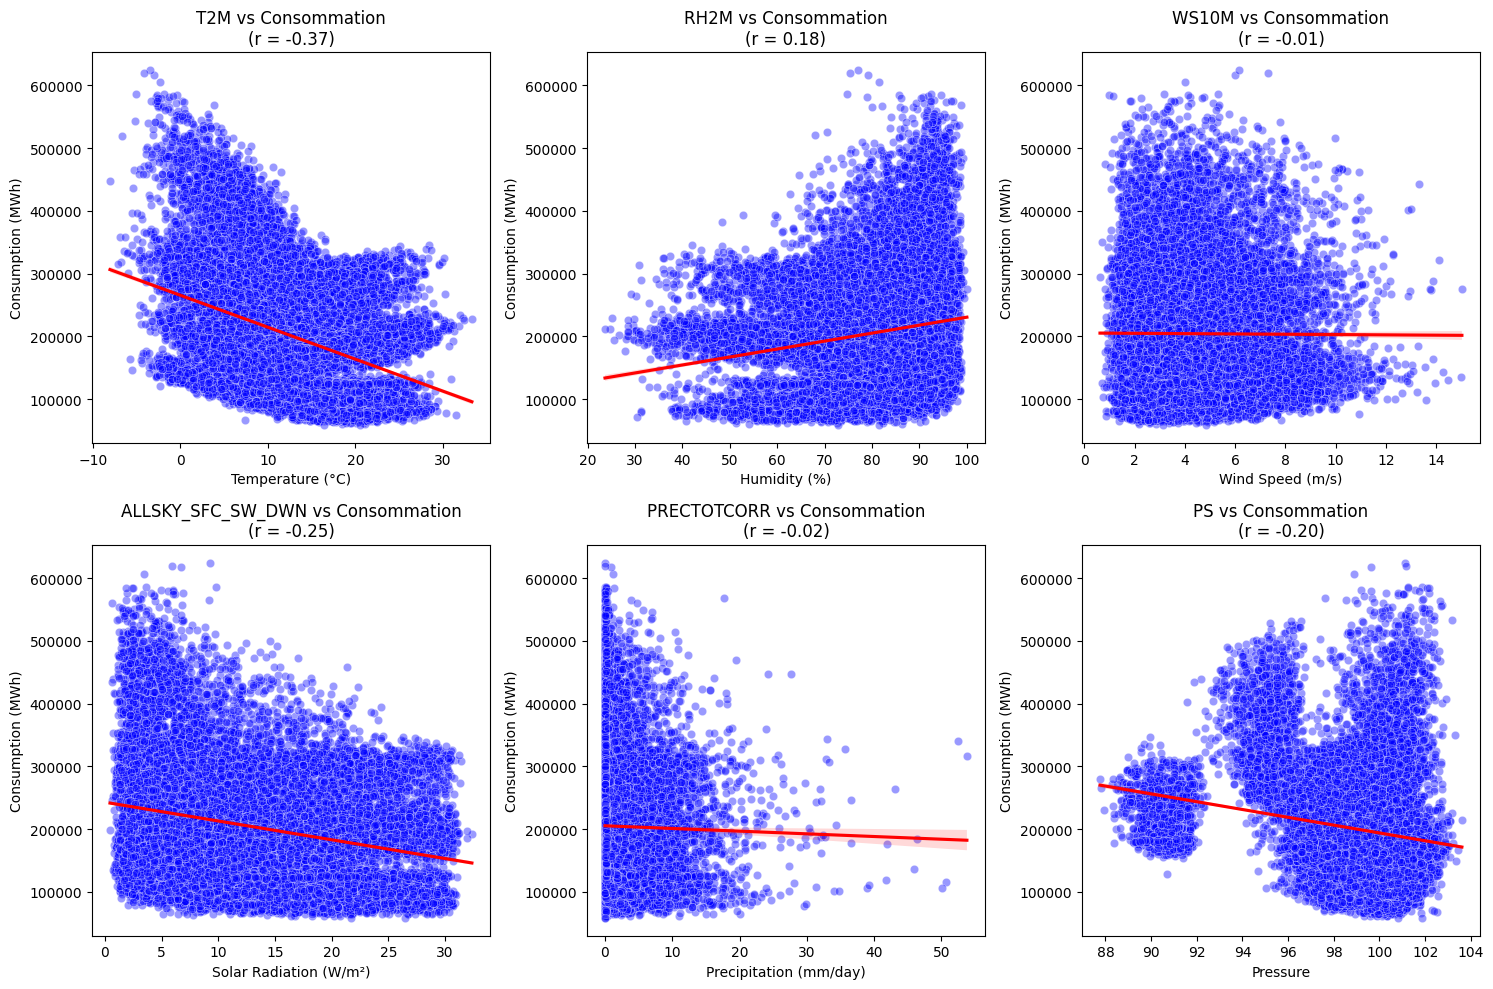

In [46]:
plt.figure(figsize=(15, 10))

for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 3, i)
    corr = df["Consommation"].corr(df[var])
    
    sns.scatterplot(data=df, x=var, y="Consommation", alpha=0.4, color='blue')
    sns.regplot(data=df, x=var, y="Consommation", scatter=False, color='red')
    
    plt.title(f"{var} vs Consommation\n(r = {corr:.2f})")
    plt.xlabel(labels.get(var, var))
    plt.ylabel("Consumption (MWh)")

plt.tight_layout()
plt.show()


### Regional comparison

### Mean comparison by regions

/tmp/ipykernel_3059/1455838715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")


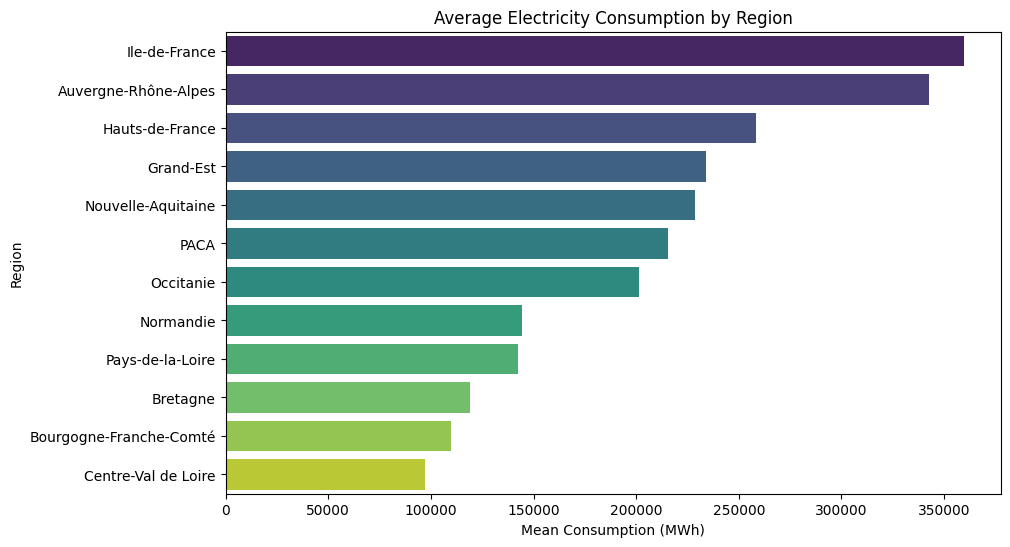

In [47]:
region_mean = df.groupby("Regions")["Consommation"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")
plt.title("Average Electricity Consumption by Region")
plt.xlabel("Mean Consumption (MWh)")
plt.ylabel("Region")
plt.show()


/tmp/ipykernel_3059/2395323793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Regions", y="T2M", palette="coolwarm")


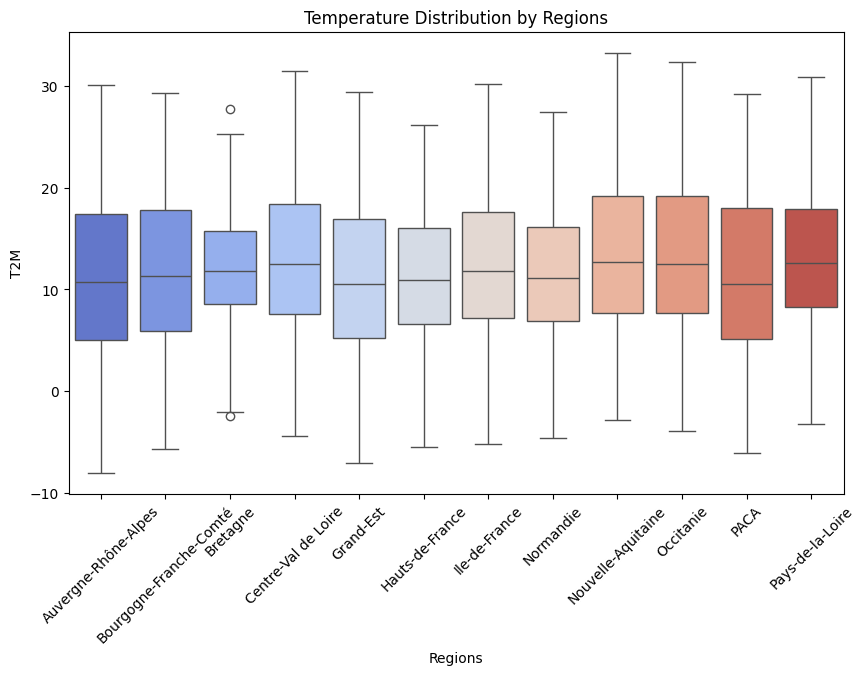

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Regions", y="T2M", palette="coolwarm")
plt.title("Temperature Distribution by Regions")
plt.xticks(rotation=45)
plt.show()


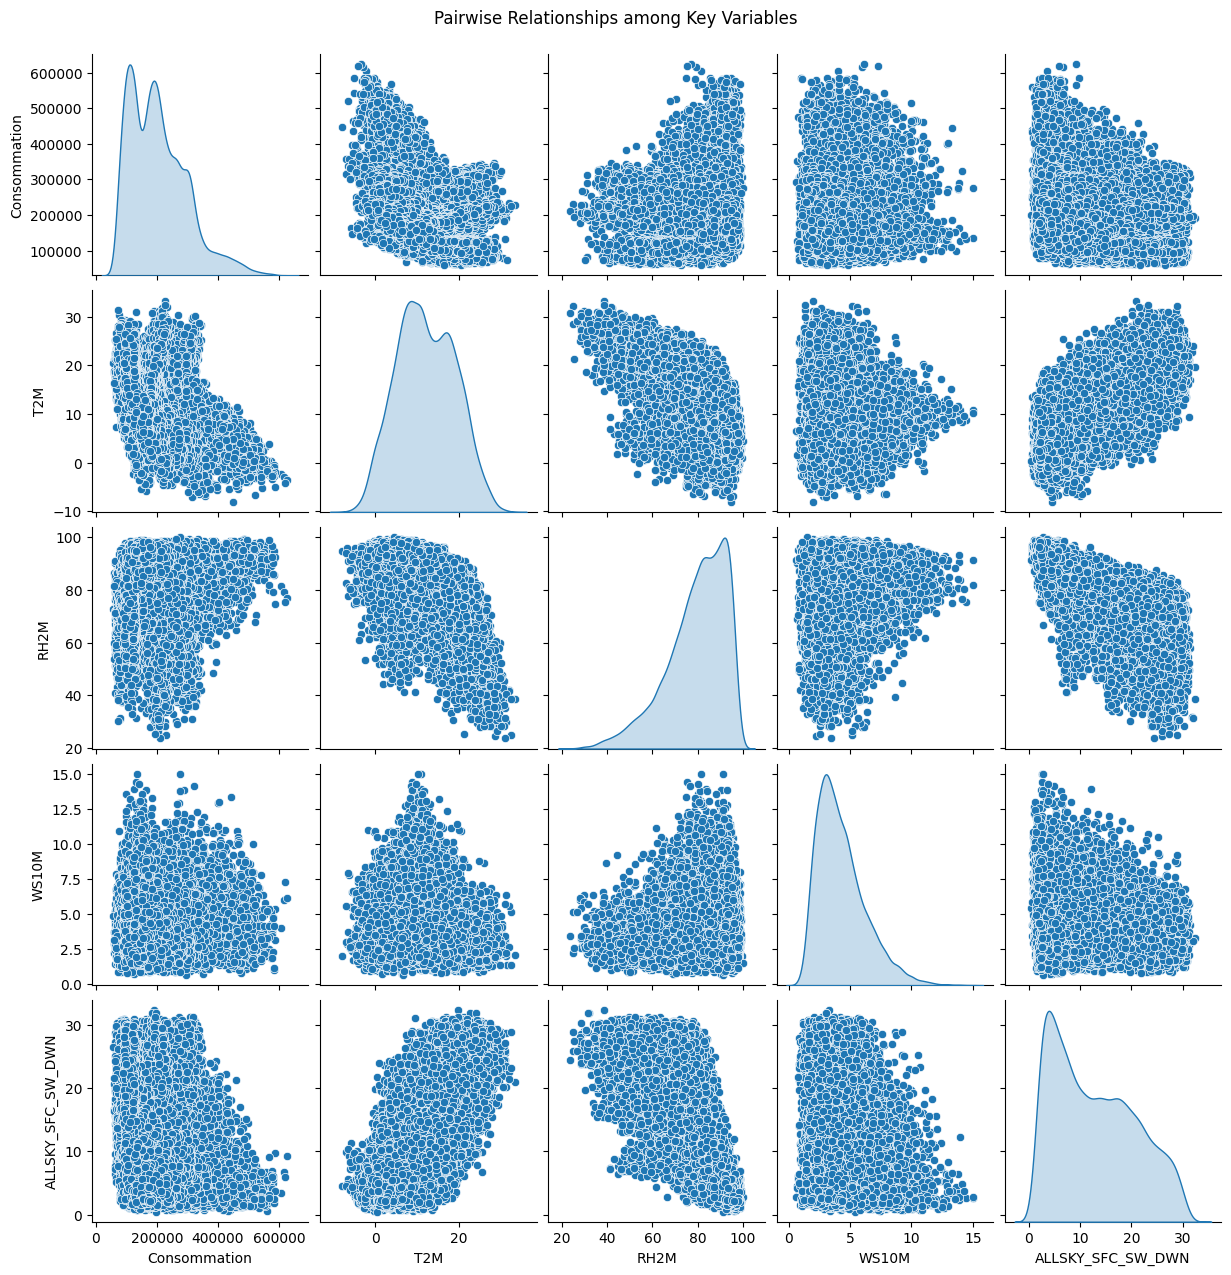

In [49]:
sns.pairplot(df[['Consommation', 'T2M', 'RH2M', 'WS10M', 'ALLSKY_SFC_SW_DWN']], diag_kind='kde')
plt.suptitle("Pairwise Relationships among Key Variables", y=1.02)
plt.show()

### Correlation heatmap

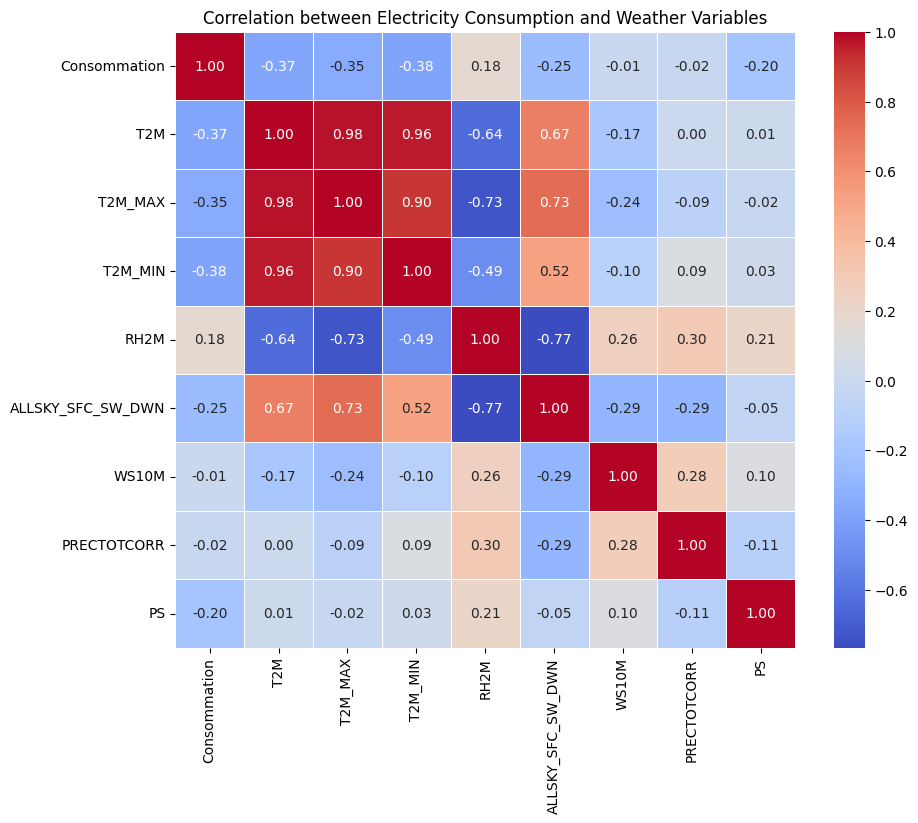

In [50]:
plt.figure(figsize=(10,8))
corr = df[['Consommation','T2M','T2M_MAX','T2M_MIN','RH2M','ALLSKY_SFC_SW_DWN','WS10M','PRECTOTCORR',"PS"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Electricity Consumption and Weather Variables")
plt.show()


In [51]:
%pip install geopandas shapely ipywidgets cartiflette



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
